In [45]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

In [82]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
class Operation(Enum):
    buy = 0
    sell = 1

In [6]:
class Option(object):
    def __init__(self,
                 operation: Operation=None,
                 option_price: float=None,
                 strike_price: float=None,
                 multiplier: int=None,
                 number: int=None):
        self.operation = operation
        self.option_price = option_price
        self.strike_price = strike_price
        self.multiplier = multiplier
        self.number = number
        # A dictionary for any gain that is calculated
        self.gain={}

In [7]:
class Call(Option):
    pass

In [8]:
class Put(Option):
    pass

In [28]:
class GainCalculation(object):
    def __init__(self):
        self.gain: float = None
    def __call__(self,
                 call_list: list,
                 put_list: list,
                 actual_price: float,
                 *args,
                 **kwargs):
        self.call_list = call_list
        self.put_list = put_list
        self.actual_price = actual_price
        self.gain = 0.0
        for call in self.call_list:
            if call.operation == Operation.buy: 
                 self._process_buy_call(call)
            else:
                 self._process_sell_call(call)

        for put in self.put_list:
            if put.operation == Operation.buy: 
                 self._process_buy_put(put)
            else:
                 self._process_sell_put(put)

    def _process_buy_call(self, call: Call):
        if self.actual_price > call.strike_price:
            price_diff: float = self.actual_price - call.strike_price
            # the value gained by executing option
            self.gain = self.gain + price_diff * call.multiplier * call.number
            # the value lost by option price
            self.gain = self.gain - call.option_price * call.number * call.multiplier
            call.gain[self.actual_price] = self.gain - call.option_price * call.number * call.multiplier
        else:
            # the value lost by option price
            self.gain = self.gain - call.option_price * call.number * call.multiplier
            call.gain[self.actual_price] = self.gain - call.option_price * call.number * call.multiplier
    def _process_sell_call(self, call: Call):
        if self.actual_price > call.strike_price:
            price_diff: float = self.actual_price - call.strike_price
            # the value lost by buyer executing option
            self.gain = self.gain - price_diff * call.multiplier * call.number
            # the value gain by option price
            self.gain = self.gain + call.option_price * call.number * call.multiplier
            call.gain[self.actual_price] = self.gain + call.option_price * call.number * call.multiplier
        else:
            # the value gain by option price
            self.gain = self.gain + call.option_price * call.number * call.multiplier
            call.gain[self.actual_price] = self.gain + call.option_price * call.number * call.multiplier
            
    def _process_buy_put(self, put: Put):
        if self.actual_price < put.strike_price:
            price_diff: float = put.strike_price - self.actual_price
            # the value gained by executing option
            self.gain = self.gain + price_diff * put.multiplier * put.number
            # the value lost by option price
            self.gain = self.gain - put.option_price * put.number * put.multiplier
            put.gain[self.actual_price] = self.gain - put.option_price * put.number * put.multiplier
        else:
            # the value lost by option price
            self.gain = self.gain - put.option_price * put.number * put.multiplier
            put.gain[self.actual_price] = self.gain - put.option_price * put.number * put.multiplier

    def _process_sell_put(self, put: Put):
        if self.actual_price < put.strike_price:
            price_diff: float = put.strike_price - self.actual_price
            # the value gained by executing option
            self.gain = self.gain - price_diff * put.multiplier * put.number
            # the value lost by option price
            self.gain = self.gain + put.option_price * put.number * put.multiplier
            put.gain[self.actual_price] = self.gain + put.option_price * put.number * put.multiplier
        else:
            # the value lost by option price
            self.gain = self.gain + put.option_price * put.number * put.multiplier
            put.gain[self.actual_price] = self.gain + put.option_price * put.number * put.multiplier


# 鹰式策略
两个看涨， 两个看跌

In [47]:
call_1 = Call(operation=Operation.buy,
              option_price=8.25,
              strike_price=2410,
              multiplier=50,
              number=1)

call_2 = Call(operation=Operation.sell,
              option_price=11.75,
              strike_price=2400,
              multiplier=50,
              number=1)

put_1 = Put(operation=Operation.buy,
            option_price=13.75,
            strike_price=2345,
            multiplier=50,
            number=1)

put_2 = Put(operation=Operation.sell,
            option_price=15.75,
            strike_price=2355,
            multiplier=50,
            number=1)

In [48]:
print("""
call_1 = Call(operation=Operation.buy,
              option_price=8.25,
              strike_price=2410,
              multiplier=50,
              number=1)

call_2 = Call(operation=Operation.sell,
              option_price=11.75,
              strike_price=2400,
              multiplier=50,
              number=1)

put_1 = Put(operation=Operation.buy,
            option_price=13.75,
            strike_price=2345,
            multiplier=50,
            number=1)

put_2 = Put(operation=Operation.sell,
            option_price=15.75,
            strike_price=2355,
            multiplier=50,
            number=1)
"""
)


call_1 = Call(operation=Operation.buy,
              option_price=8.25,
              strike_price=2410,
              multiplier=50,
              number=1)

call_2 = Call(operation=Operation.sell,
              option_price=11.75,
              strike_price=2400,
              multiplier=50,
              number=1)

put_1 = Put(operation=Operation.buy,
            option_price=13.75,
            strike_price=2345,
            multiplier=50,
            number=1)

put_2 = Put(operation=Operation.sell,
            option_price=15.75,
            strike_price=2355,
            multiplier=50,
            number=1)



In [49]:
gain_calculator = GainCalculation()

## 标的价格2400收益

In [50]:
gain_calculator(call_list=[call_1, call_2],
                put_list=[put_1, put_2],
                actual_price=2400)

In [51]:
gain_calculator.gain

275.0

## 标的价格2500收益

In [52]:
gain_calculator(call_list=[call_1, call_2],
                put_list=[put_1, put_2],
                actual_price=2500)

In [53]:
gain_calculator.gain

-225.0

## 标的价格2300收益

In [54]:
gain_calculator(call_list=[call_1, call_2],
                put_list=[put_1, put_2],
                actual_price=2300)

In [55]:
gain_calculator.gain

-225.0

## 以上计算的收益汇总

In [56]:
print(call_1.gain, call_2.gain, put_1.gain, put_2.gain)

{2400: -825.0, 2500: 3675.0, 2300: -825.0} {2400: 762.5, 2500: 262.5, 2300: 762.5} {2400: -1200.0, 2500: -1700.0, 2300: 1050.0} {2400: 1062.5, 2500: 562.5, 2300: 562.5}


## 收益分布

In [89]:
actual_price_array = np.arange(2300,2500,1)
gain_list = []

In [90]:
gain_calculator = GainCalculation()
for actual_price in actual_price_array:
    gain_calculator(call_list=[call_1, call_2],
                    put_list=[put_1, put_2],
                    actual_price=actual_price)
    gain_list.append(gain_calculator.gain)

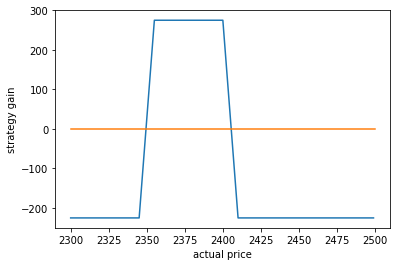

In [94]:
_ = plt.plot(actual_price_array, gain_list)
_ = plt.plot([2300,2500],[0,0])
_ = plt.xlabel('actual price')
_ = plt.ylabel('strategy gain')